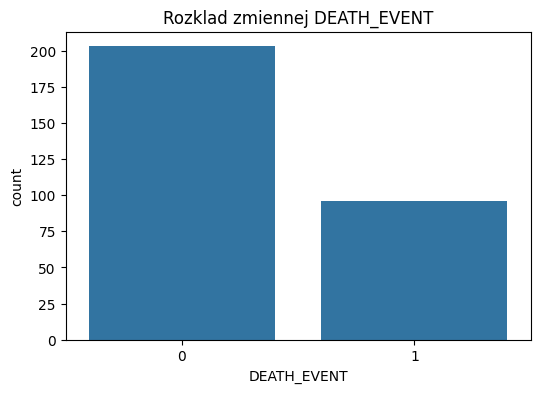

Dokladnosc (holdout): 0.75
Dokladnosc (walidacja krzyzowa): 0.8032801418439716 (+/- 0.05391893238980943)
Dokladnosc (kernel=poly): 0.7656028368794325 (+/- 0.04088926965130428)
Dokladnosc (kernel=rbf): 0.8032801418439716 (+/- 0.05391893238980943)
Dokladnosc (kernel=sigmoid): 0.836613475177305 (+/- 0.06021690084291448)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
url = "https://raw.githubusercontent.com/lorenzodenisi/Heart-Failure-Clinical-Records/refs/heads/master/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url)
df.head()
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Rozklad zmiennej DEATH_EVENT')
plt.show()
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Model SVM
svm_model = SVC(random_state=42)
# Trenowanie modelu
svm_model.fit(X_train_scaled, y_train)
# Predykcje na zbiorze testowym
y_pred = svm_model.predict(X_test_scaled)
# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokladnosc (holdout): {accuracy}")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print(f"Dokladnosc (walidacja krzyzowa): {scores.mean()} (+/- {scores.std()})")
kernels = ['poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_kernel = SVC(kernel=kernel, random_state=42)
    scores = cross_val_score(svm_kernel, X_train_scaled, y_train, cv=5)
    print(f"Dokladnosc (kernel={kernel}): {scores.mean()} (+/- {scores.std()})")


✓ Zadanie 2. Jakie wynik dokładności osiągnęły klasyfikatory? Który jest najlepszy pod kątem dokładności? Z czego to może wynikać?

Najlepszy wynik dokładności osiągnął klasyfikator SVM z jądrem sigmoid: 0.8366.

Drugie miejsce zajmuje jądro rbf z wynikiem 0.8033.

Najsłabszy okazał się kernel poly: 0.7656.
sigmoid wypada lepiej przez : Charakterystyka danych,Skalowanie danych,Mały zbiór danych

✓ Zadanie 3. Zmodyfikuj kod z zadania w taki sposób aby można było uzyskać wynik F1-Score oraz Krzywą ROC wraz z AUC. Wykonaj ponownie obliczenia dla nowych metryk jakości modelu. Jakie tym razem wyniki wychodzą? Które metryki mają większą wiarygodność na niezbalansowanym zbiorze danych?

F1-score: 0.6316
AUC: 0.8206


<Figure size 600x400 with 0 Axes>

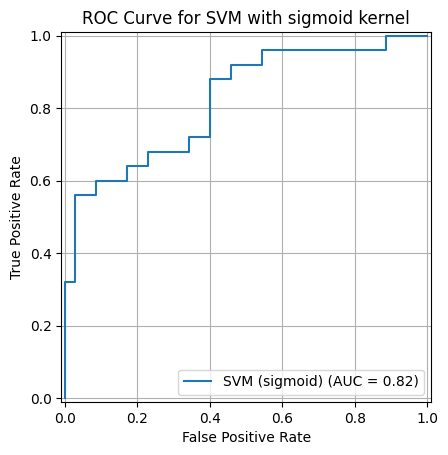

In [2]:
from sklearn.metrics import f1_score, roc_curve, auc, RocCurveDisplay

# Model SVM z najlepszym kernelem
svm_best = SVC(kernel='sigmoid', probability=True, random_state=42)
svm_best.fit(X_train_scaled, y_train)

# Predykcje
y_pred = svm_best.predict(X_test_scaled)
y_proba = svm_best.predict_proba(X_test_scaled)[:, 1]

# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

# ROC i AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# Wykres ROC
plt.figure(figsize=(6, 4))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM (sigmoid)').plot()
plt.title('ROC Curve for SVM with sigmoid kernel')
plt.grid()
plt.show()


Zadanie 4. Złożone klasyfikatory mają dużo hiperparametrów. Zmodyfikuj kod z zadania w taki sposób, aby zbadać wpływ poszczególnych hiperparametrów możesz dokonac pewnych modyfikacji np.: kernel=’sigmoid’, C=10, degree=3, gamma=’scale’, random state=123, probability=True. Jak to wpływa na wyniki?

Dokładność: 0.7833
F1-score: 0.6829
AUC: 0.7966

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



<Figure size 600x400 with 0 Axes>

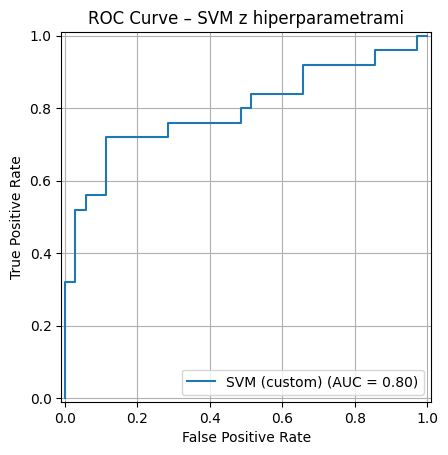

In [3]:
from sklearn.metrics import classification_report


svm_custom = SVC(
    kernel='sigmoid',
    C=10,
    degree=3,
    gamma='scale',
    random_state=123,
    probability=True
)

# Trening
svm_custom.fit(X_train_scaled, y_train)

# Predykcje
y_pred = svm_custom.predict(X_test_scaled)
y_proba = svm_custom.predict_proba(X_test_scaled)[:, 1]

# Ocena
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

/
print(f"Dokładność: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))

# Wykres ROC
plt.figure(figsize=(6, 4))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM (custom)').plot()
plt.title('ROC Curve – SVM z hiperparametrami')
plt.grid()
plt.show()


✓ Zadanie *dla chętnych. Mając już gotowy kod do testowania SVM sprawdź jakie wyniki uzyska dla danych Breast Cancer Coimbra : https://raw.githubusercontent.com/ cshasha/breast-cancer/refs/heads/master/dataR2.csv. Uwaga zmienna odpowiedzi przyjmuje wartości 1 oraz 2.

=== Breast Cancer Coimbra – SVM (sigmoid, C=10) ===
Dokładność: 0.7083
F1-score: 0.7407
AUC: 0.7639

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.67      0.83      0.74        12

    accuracy                           0.71        24
   macro avg       0.72      0.71      0.70        24
weighted avg       0.72      0.71      0.70        24



<Figure size 600x400 with 0 Axes>

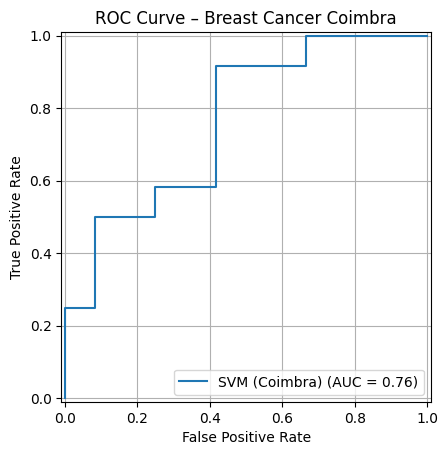

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt

# 1. Wczytanie danych
url_bc = "https://raw.githubusercontent.com/cshasha/breast-cancer/refs/heads/master/dataR2.csv"
df_bc = pd.read_csv(url_bc)

# 2. Przygotowanie danych
X = df_bc.drop('Classification', axis=1)
y = df_bc['Classification'] - 1  # Zamiana: 1 → 0, 2 → 1

# 3. Podział i skalowanie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model SVM
svm_bc = SVC(kernel='sigmoid', C=10, gamma='scale', probability=True, random_state=123)
svm_bc.fit(X_train_scaled, y_train)

# 5. Ocena modelu
y_pred = svm_bc.predict(X_test_scaled)
y_proba = svm_bc.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 6. Wyniki
print("=== Breast Cancer Coimbra – SVM (sigmoid, C=10) ===")
print(f"Dokładność: {acc:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))

# 7. ROC Curve
plt.figure(figsize=(6, 4))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM (Coimbra)').plot()
plt.title('ROC Curve – Breast Cancer Coimbra')
plt.grid()
plt.show()
